### 비트코인 가격 예측  

*참고  
처음으로 0에 수렴하는 시차 이후에 상관이 크게 줄어드는 지점이 적절한 차분 횟수이다.  
하지만 일반적인 기준점이므로, 실제와 다를 수는 있기 때문에 여러 차분을 시도하여 결정해야 한다.

In [132]:
import pandas as pd
import json

with open('./datasets/bitcoin_2010_2024.json') as f :
    json_data = json.load(f)

bitcoin_df = pd.DataFrame(json_data['market-price'])
bitcoin_df

,x,y
0,1230940800000,0.00
1,1231286400000,0.00
2,1231632000000,0.00
3,1231977600000,0.00
4,1232323200000,0.00
...,...,...
1405,1716508800000,67942.23
1406,1716854400000,69374.17
1407,1717200000000,67484.93
1408,1717545600000,70553.24


In [133]:
from datetime import datetime

def changeData(milis) :
    timestamp = milis / 1000
    converted_time = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
    return converted_time

In [134]:
bitcoin_df.x = bitcoin_df.x.apply(changeData)
bitcoin_df

,x,y
0,2009-01-03,0.00
1,2009-01-07,0.00
2,2009-01-11,0.00
3,2009-01-15,0.00
4,2009-01-19,0.00
...,...,...
1405,2024-05-24,67942.23
1406,2024-05-28,69374.17
1407,2024-06-01,67484.93
1408,2024-06-05,70553.24


In [135]:
bitcoin_df.set_index('x', inplace=True)
bitcoin_df

,y
x,
2009-01-03,0.00
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [136]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0+ KB


In [142]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB


In [143]:
bitcoin_df

,y
x,
2009-01-03,0.00
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


Text(0.5, 1.0, 'Bitcoin')

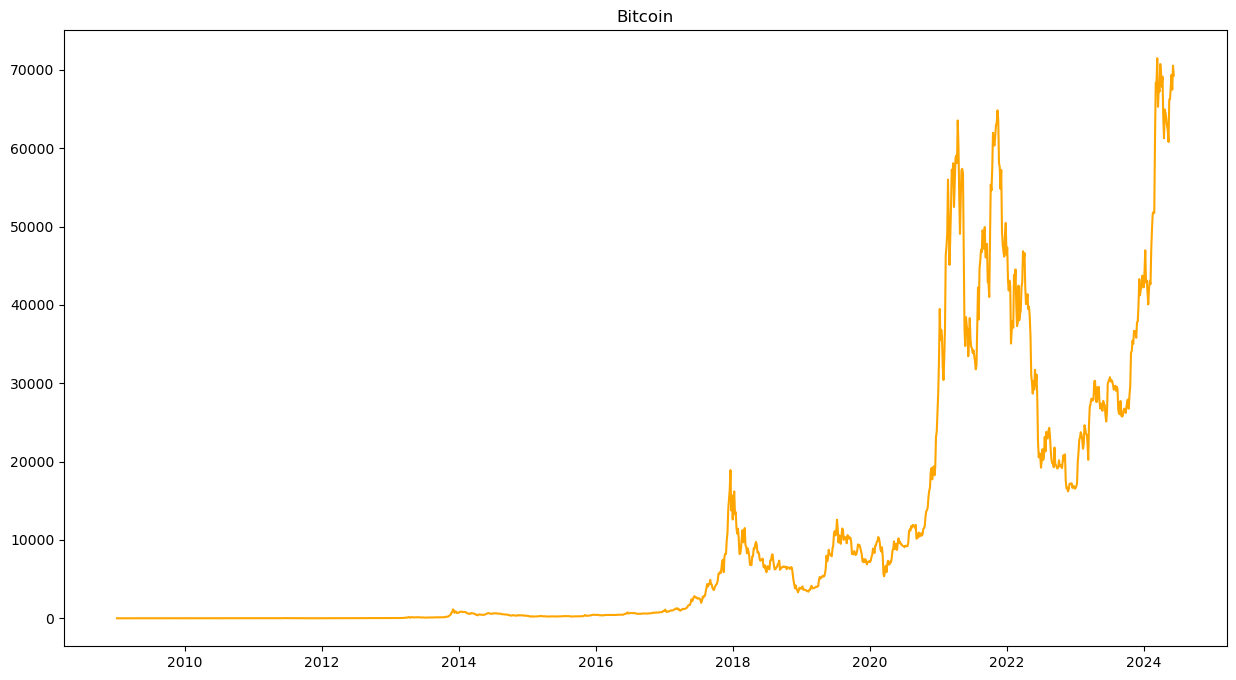

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(bitcoin_df, c='orange')
plt.title('Bitcoin')

In [45]:
import yfinance as yf

bitcoin_df_index = bitcoin_df['y']

In [52]:
bitcoin_df_index

x
2009-01-03        0.00
2009-01-07        0.00
2009-01-11        0.00
2009-01-15        0.00
2009-01-19        0.00
                ...   
2024-05-24    67942.23
2024-05-28    69374.17
2024-06-01    67484.93
2024-06-05    70553.24
2024-06-09    69297.93
Name: y, Length: 1410, dtype: float64

In [93]:
bitcoin_df_index = bitcoin_df_index.loc['2018-10-01':]
bitcoin_df = bitcoin_df.loc['2018-10-01':]

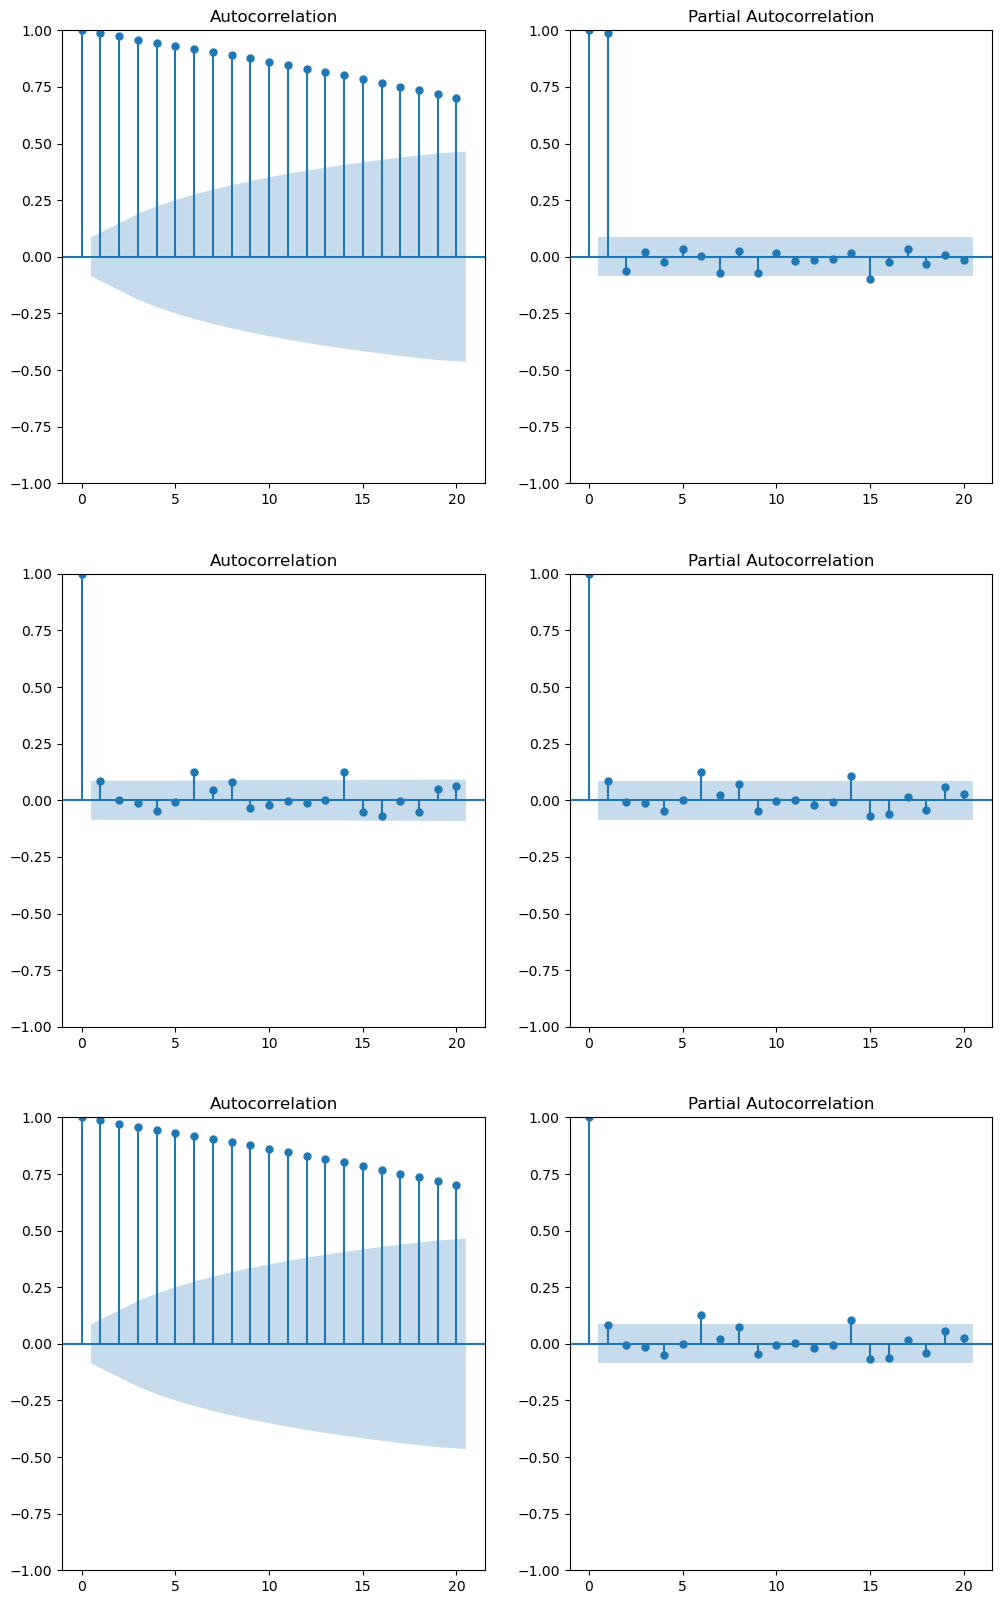

In [71]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(3, 2, figsize=(12, 20))

plot_acf(bitcoin_df_index, lags=20, ax=ax[0][0])
plot_pacf(bitcoin_df_index, lags=20, ax=ax[0][1])

plot_acf(bitcoin_df_index.diff().dropna(), lags=20, ax=ax[1][0])
plot_pacf(bitcoin_df_index.diff().dropna(), lags=20, ax=ax[1][1])

plot_acf(bitcoin_df_index, lags=20, ax=ax[2][0])
plot_pacf(bitcoin_df_index.diff().dropna(), lags=20, ax=ax[2][1])
plt.show()

In [64]:
bitcoin_diff_df = bitcoin_df_index.diff()
bitcoin_diff_df.dropna(inplace=True)
bitcoin_diff_df

x
2018-10-07      52.31
2018-10-11       7.45
2018-10-15    -315.91
2018-10-19     244.45
2018-10-23     -15.72
               ...   
2024-05-24    1676.16
2024-05-28    1431.94
2024-06-01   -1889.24
2024-06-05    3068.31
2024-06-09   -1255.31
Name: y, Length: 519, dtype: float64

In [141]:
window_size = 21

moving_avg = bitcoin_df_index.rolling(window_size).mean()
print(moving_avg)

moving_avg_diff = bitcoin_diff_df.rolling(window_size).mean()
print(moving_avg_diff)

x
2018-10-03             NaN
2018-10-07             NaN
2018-10-11             NaN
2018-10-15             NaN
2018-10-19             NaN
                  ...     
2024-05-24    66240.335238
2024-05-28    66287.787619
2024-06-01    66248.646190
2024-06-05    66204.075714
2024-06-09    66394.278571
Name: y, Length: 520, dtype: float64
x
2018-10-07           NaN
2018-10-11           NaN
2018-10-15           NaN
2018-10-19           NaN
2018-10-23           NaN
                 ...    
2024-05-24    322.368571
2024-05-28     47.452381
2024-06-01    -39.141429
2024-06-05    -44.570476
2024-06-09    190.202857
Name: y, Length: 519, dtype: float64


In [67]:
bitcoin_df_index.index

Index(['2018-10-03', '2018-10-07', '2018-10-11', '2018-10-15', '2018-10-19',
       '2018-10-23', '2018-10-27', '2018-10-31', '2018-11-04', '2018-11-08',
       ...
       '2024-05-04', '2024-05-08', '2024-05-12', '2024-05-16', '2024-05-20',
       '2024-05-24', '2024-05-28', '2024-06-01', '2024-06-05', '2024-06-09'],
      dtype='object', name='x', length=520)

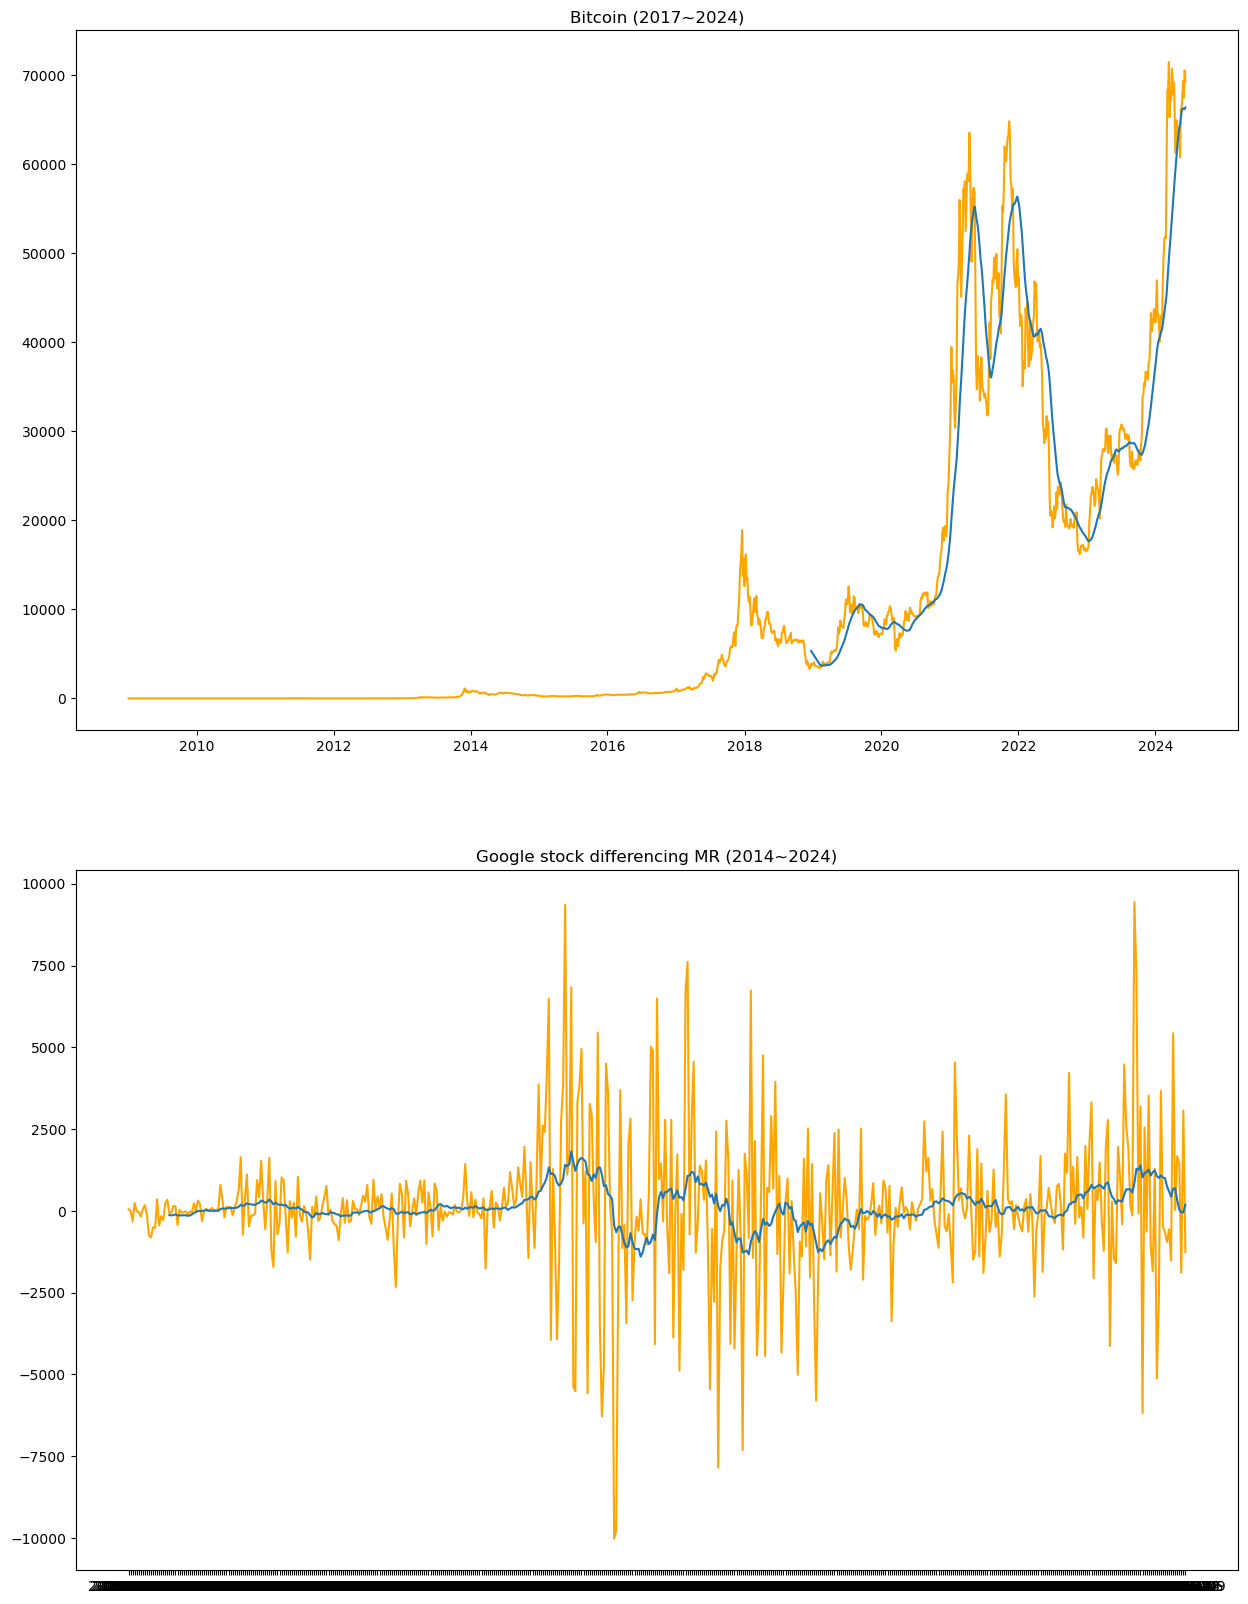

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 20))

plt.subplot(2, 1, 1)
plt.plot(bitcoin_df, c='orange')

plt.subplot(2, 1, 1)
plt.plot(moving_avg)

plt.title('Bitcoin (2017~2024)')

plt.subplot(2, 1, 2)
plt.plot(bitcoin_diff_df, c='orange')

plt.subplot(2, 1, 2)
plt.plot(moving_avg_diff)

plt.title('Google stock differencing MR (2014~2024)')

plt.show()

In [100]:
bitcoin_df_index.diff()

x
2018-10-03        NaN
2018-10-07      52.31
2018-10-11       7.45
2018-10-15    -315.91
2018-10-19     244.45
               ...   
2024-05-24    1676.16
2024-05-28    1431.94
2024-06-01   -1889.24
2024-06-05    3068.31
2024-06-09   -1255.31
Name: y, Length: 520, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

DataFrame index range: 2018-10-03 00:00:00 to 2024-06-09 00:00:00


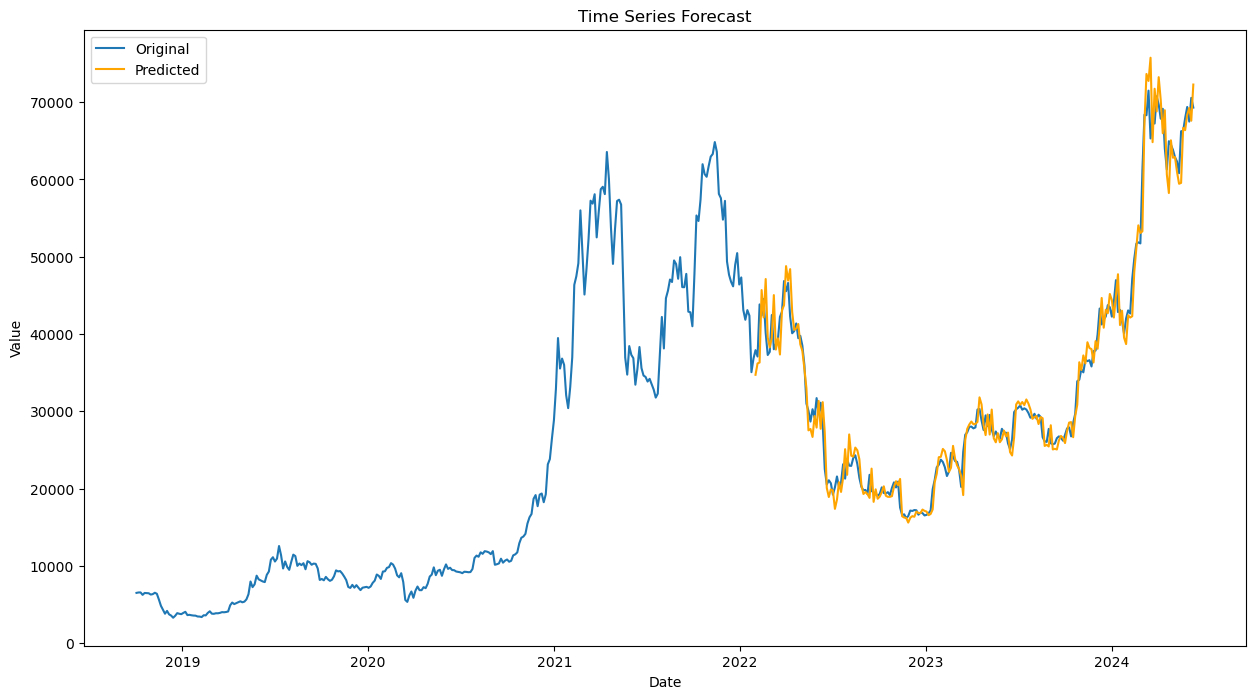

In [127]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt


# 데이터프레임의 인덱스를 datetime 형식으로 변환
bitcoin_df_index.index = pd.to_datetime(bitcoin_df_index.index)

# ARIMA 모델 적합
model = ARIMA(bitcoin_df_index, order=(3, 6, 21))
model_fit = model.fit()

# 데이터프레임 인덱스 범위 확인
print(f"DataFrame index range: {bitcoin_df_index.index.min()} to {bitcoin_df_index.index.max()}")

# 예측 시작 및 종료 날짜 설정
start_index = pd.to_datetime('2022-02-01')
end_index = pd.to_datetime('2024-06-09')

# 데이터프레임 인덱스 범위 내에 있는지 확인
if start_index < bitcoin_df_index.index.min() or end_index > bitcoin_df_index.index.max():
    raise ValueError("Start or end date is out of the DataFrame index range.")

# start_index와 end_index가 데이터프레임 인덱스와 일치하도록 조정
start_index = bitcoin_df_index.index[bitcoin_df_index.index.get_indexer([start_index], method='nearest')[0]]
end_index = bitcoin_df_index.index[bitcoin_df_index.index.get_indexer([end_index], method='nearest')[0]]

# 예측 수행
forecast = model_fit.predict(start=start_index, end=end_index)

# 그래프 그리기
plt.figure(figsize=(15, 8))
plt.plot(bitcoin_df_index, label='Original')
plt.plot(forecast, label='Predicted', color='orange')
plt.title("Time Series Forecast")
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [128]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error


forecast = forecast[:-1]

# 평균 제곱 오차 및 평균 제곱 로그 오차 계산
mse = mean_squared_error(bitcoin_df_index['2022-02-01':'2024-06-09'], forecast)
msle = mean_squared_log_error(bitcoin_df_index['2022-02-01':'2024-06-09'], forecast)

# 결과 출력
print("Mean Squared Error:", mse)
print("Mean Squared Log Error:", msle)


Mean Squared Error: 9362865.834915614
Mean Squared Log Error: 0.007765585582042378
